In [18]:
import random
import copy
import matplotlib.pyplot as plt 

class GeneticAlgorithm:
    def __init__(self, data, **kargs):
        self.data = data
        self.POPULATION_SIZE           = kargs.get("population_size", 50)
        self.MAX_WEIGHT                = kargs.get("max_weight", 12210)
        self.MAX_VOLUME                = kargs.get("max_volume", 12)
        self.MAX_GENERATIONS           = kargs.get("max_generations", 50)
        self.NUMBER_OF_ELITES          = kargs.get("elites", 5)
        self.TOURNAMENT_SELECTION_SIZE = 5
        self.CROSSING_RATE             = 0.8
        self.MUTATION_RATE             = 0.2
        self.population                = self._genPopulation()
        self.evolutionGraph            = []
    
    def fittest(self):
        return self.population[0]

    def _nbItemsInChromosome(self, chromosome):
        return [i for i in chromosome if i == 1].__len__()
    
    def printFittest(self):
        fittestOne = self.fittest()
        nb_items = self._nbItemsInChromosome(fittestOne)
        print("\nselected {} items with total value equals to {}".format(nb_items, self._fitness(fittestOne)))

        for (i,(selected, item)) in enumerate(zip(self.fittest(), self.data)):
            if selected:
                print("\titem index{}: weight={} volume={} price={} name={}".format(i, item[0], item[1], item[2], item[3]))

    def printEvolutionGraph(self):
        _, ax = plt.subplots(figsize=(10, 6))
        xAxis = [iteration for (iteration, _) in self.evolutionGraph]
        yAxis = [self._fitness(chromosome) for (_, chromosome) in self.evolutionGraph]
        #markerSize = [self._nbItemsInChromosome(c)**2 for (_, c) in self.evolutionGraph]
        
        ax.scatter(x = xAxis, y = yAxis, alpha=0.5)
        # print number of item for each solution (point)
        for (i, chromosome) in self.evolutionGraph:
            plt.text(i, self._fitness(chromosome), self._nbItemsInChromosome(chromosome), horizontalalignment='center', verticalalignment='center', fontdict={'color':'white', 'size': 7})

        plt.xlabel("Iteration")
        plt.ylabel("Total value of knapsack's items")
        ax.set_yticks(yAxis, minor=True)
        plt.grid(linestyle='--', alpha=0.5)
        plt.plot(xAxis, yAxis)
        plt.show()

    def _genChromosome(self):
        return [random.randint(0,1) for _ in self.data]

    def _genPopulation(self):
        population = [self._genChromosome() for _ in range(self.POPULATION_SIZE)]
        population.sort(key=lambda x: self._fitness(x), reverse=True)

        return population
    
    def _fitness(self, chromosome):
        weight, volume, price = 0, 0, 0
        for (selected, item) in zip(chromosome, self.data):
            if selected:
                weight += item[0]
                volume += item[1]
                price += item[2]
        if weight > self.MAX_WEIGHT or volume > self.MAX_VOLUME:
            price = 0
        return price
    
    def select_tournament(self, population):
        tournament_pop = []
        i = 0
        while i < self.TOURNAMENT_SELECTION_SIZE :
            tournament_pop.append(population[random.randrange(0,self.POPULATION_SIZE)])
            i += 1
        tournament_pop.sort(key=lambda x: self._fitness(x), reverse=True)
        
        # lists are mutable objects, we use [:] to return a copy
        return tournament_pop[0][:]

    def crossover_chromosomes(self, parent1, parent2):
        if random.random() < self.CROSSING_RATE: 
            child1 = self._genChromosome()
            child2 = self._genChromosome()

            '''One Point Cross Over'''
            index = random.randrange(1, child1.__len__())
            child1 = parent1[:index] + parent2[index:]
            child2 = parent2[:index] + parent1[index:]

            print("\nMaking a cross")
            print("Parent1: ",parent1)
            print("Parent2: ",parent2)
            print("Child1 : ", child1)
            print("Child1 : ", child2)

            return child1, child2
        else:
            return parent1, parent2

    def mutate_chromosome(self, chromosome):
        if random.random() < self.MUTATION_RATE:
            print("\nMaking a mutation")
            print("From: ",chromosome)

            random_bit_position = random.randrange(0,chromosome.__len__())
            if chromosome[random_bit_position] == 0:
                chromosome[random_bit_position] = 1
            else:
                chromosome[random_bit_position] = 0

            print("To:   ",chromosome)
        
        return chromosome
            
    def run(self):
        i = 0
        while i < self.MAX_GENERATIONS :
            # lists are mutable objects, we use [:] to return a copy
            self.evolutionGraph.append((i, self.population[0][:]))
            
            i += 1
            new_population = []
            '''Keep The Fittest Chromosomes'''
            for elite in range(self.NUMBER_OF_ELITES):
                # lists are mutable objects, we use [:] to return a copy
                new_population.append(self.population[elite][:])
            

            print("\nCrossover and Mutation Trace:")
            while new_population.__len__() < self.POPULATION_SIZE:
                parent1 = self.select_tournament(self.population)
                parent2 = self.select_tournament(self.population)


                child1, child2 = self.crossover_chromosomes(parent1, parent2)


                self.mutate_chromosome(child1)
                self.mutate_chromosome(child2)


                new_population.append(child1)

                # make sure to not depass the population size if we keep the elite
                if new_population.__len__() < self.POPULATION_SIZE:
                    new_population.append(child2)

            new_population.sort(key=lambda x: self._fitness(x), reverse=True)
            self.population = new_population


    
 

In [12]:
data = [(821, 0.8, 118, 'A'), (1144, 1, 322, 'B'), (634, 0.7, 166, 'C'), (701, 0.9, 195, 'D'),(53, 0.7, 30, 'TTSS'),(88, 0.1, 5, 'TSAST'),
            (291, 0.9, 100, 'E'), (1702, 0.8, 142, 'F'), (1633, 0.7, 100, 'G'), (1086, 0.6, 145, 'H'),(10, 0.2, 10, '88DTT'), (5, 0.1, 2, 'TT85'),
            (124, 0.6, 100, 'J'), (718, 0.9, 208, 'K'), (976, 0.6, 100, 'L'), (1438, 0.7, 312, 'M'),(1993, 0.25, 338, 'ZDQDSTT'),
            (910, 1, 198, 'W'), (148, 0.7, 171, 'S'), (1636, 0.9, 117, 'V'), (237, 0.6, 100, 'N'),(3, 0.7, 30, 'DSDTT'), (83, 0.7, 12, 'TT'),
            (771, 0.9, 329, 'Z'), (604, 0.6, 391, 'P'), (1078, 0.6, 100, 'QA'), (640, 0.8, 120, 'O'),
            (1510, 1, 188, 'RE'), (741, 0.6, 271, 'JSU'), (1358, 0.9, 334, 'GT'), (1682, 0.7, 153, 'FA'),
            (993, 0.7, 130, 'TT'),(93, 0.4, 1130, 'TDST'),(93, 0.9, 96, 'TTD'),(1993, 0.7, 130, 'RZD'), (99, 0.7, 100, 'MA'), (1068, 0.8, 154, 'SA'), (1669, 1, 289, 'KI')]


In [34]:
ga = GeneticAlgorithm(data, max_weight=12210, max_volume=12, max_generations=20, population_size=200, elites=5) 
ga.run()
 



Crossover and Mutation Trace:

Making a cross
Parent1:  [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
Parent2:  [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
Child1 :  [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
Child1 :  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

Making a mutation
From:  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
To:    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

Making a cross
Parent1:  [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
Parent2:  [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [35]:
print(ga.printFittest())


selected 19 items with total value equals to 4525
	item index1: weight=1144 volume=1 price=322 name=B
	item index2: weight=634 volume=0.7 price=166 name=C
	item index5: weight=88 volume=0.1 price=5 name=TSAST
	item index10: weight=10 volume=0.2 price=10 name=88DTT
	item index11: weight=5 volume=0.1 price=2 name=TT85
	item index15: weight=1438 volume=0.7 price=312 name=M
	item index16: weight=1993 volume=0.25 price=338 name=ZDQDSTT
	item index17: weight=910 volume=1 price=198 name=W
	item index18: weight=148 volume=0.7 price=171 name=S
	item index20: weight=237 volume=0.6 price=100 name=N
	item index23: weight=771 volume=0.9 price=329 name=Z
	item index24: weight=604 volume=0.6 price=391 name=P
	item index26: weight=640 volume=0.8 price=120 name=O
	item index28: weight=741 volume=0.6 price=271 name=JSU
	item index29: weight=1358 volume=0.9 price=334 name=GT
	item index31: weight=993 volume=0.7 price=130 name=TT
	item index32: weight=93 volume=0.4 price=1130 name=TDST
	item index33: wei

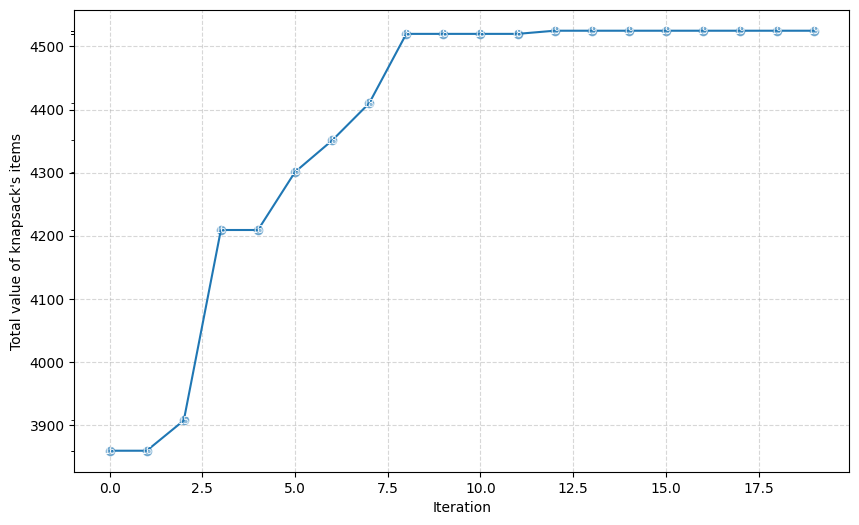

In [36]:
ga.printEvolutionGraph()

- Elites number of fittest chromosomes to keep after each generation
- population_size number of chromosomes
- max_generations number of generations
- crossover rate pre-defined parameter of the crossover rate, equals to 0.8
- mutation rate pre-defined parameter of the mutaion rate, equals to 0.2